In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [30]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [31]:
for col in df.select_dtypes(exclude=['int64', 'float64']).columns:
    if col not in ["State"]:
        df[col] = df[col].astype(str).str.strip().str.title()

In [32]:
for col in df.select_dtypes(exclude=['int64', 'float64']).columns:
    if col not in ['Employee_Name', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']:
        value_counts = df[col].value_counts(dropna=False).to_dict()
        print(f"{col}: {value_counts}")
        print("=" * 20)

Position: {'Production Technician I': 137, 'Production Technician Ii': 57, 'Area Sales Manager': 27, 'Production Manager': 14, 'Software Engineer': 10, 'It Support': 8, 'Data Analyst': 8, 'Network Engineer': 5, 'Sr. Network Engineer': 5, 'Database Administrator': 5, 'Bi Developer': 4, 'Sales Manager': 3, 'Accountant I': 3, 'Senior Bi Developer': 3, 'Administrative Assistant': 3, 'Sr. Accountant': 2, 'It Manager - Db': 2, 'Sr. Dba': 2, 'President & Ceo': 1, 'Data Architect': 1, 'Principal Data Architect': 1, 'It Manager - Infra': 1, 'Shared Services Manager': 1, 'It Director': 1, 'Director Of Sales': 1, 'It Manager - Support': 1, 'Director Of Operations': 1, 'Bi Director': 1, 'Software Engineering Manager': 1, 'Enterprise Architect': 1, 'Cio': 1}
State: {'MA': 276, 'CT': 6, 'TX': 3, 'VT': 2, 'UT': 1, 'AZ': 1, 'ND': 1, 'OR': 1, 'MT': 1, 'NV': 1, 'ID': 1, 'KY': 1, 'NC': 1, 'FL': 1, 'GA': 1, 'CO': 1, 'NY': 1, 'PA': 1, 'RI': 1, 'NH': 1, 'TN': 1, 'IN': 1, 'OH': 1, 'CA': 1, 'WA': 1, 'AL': 1, 

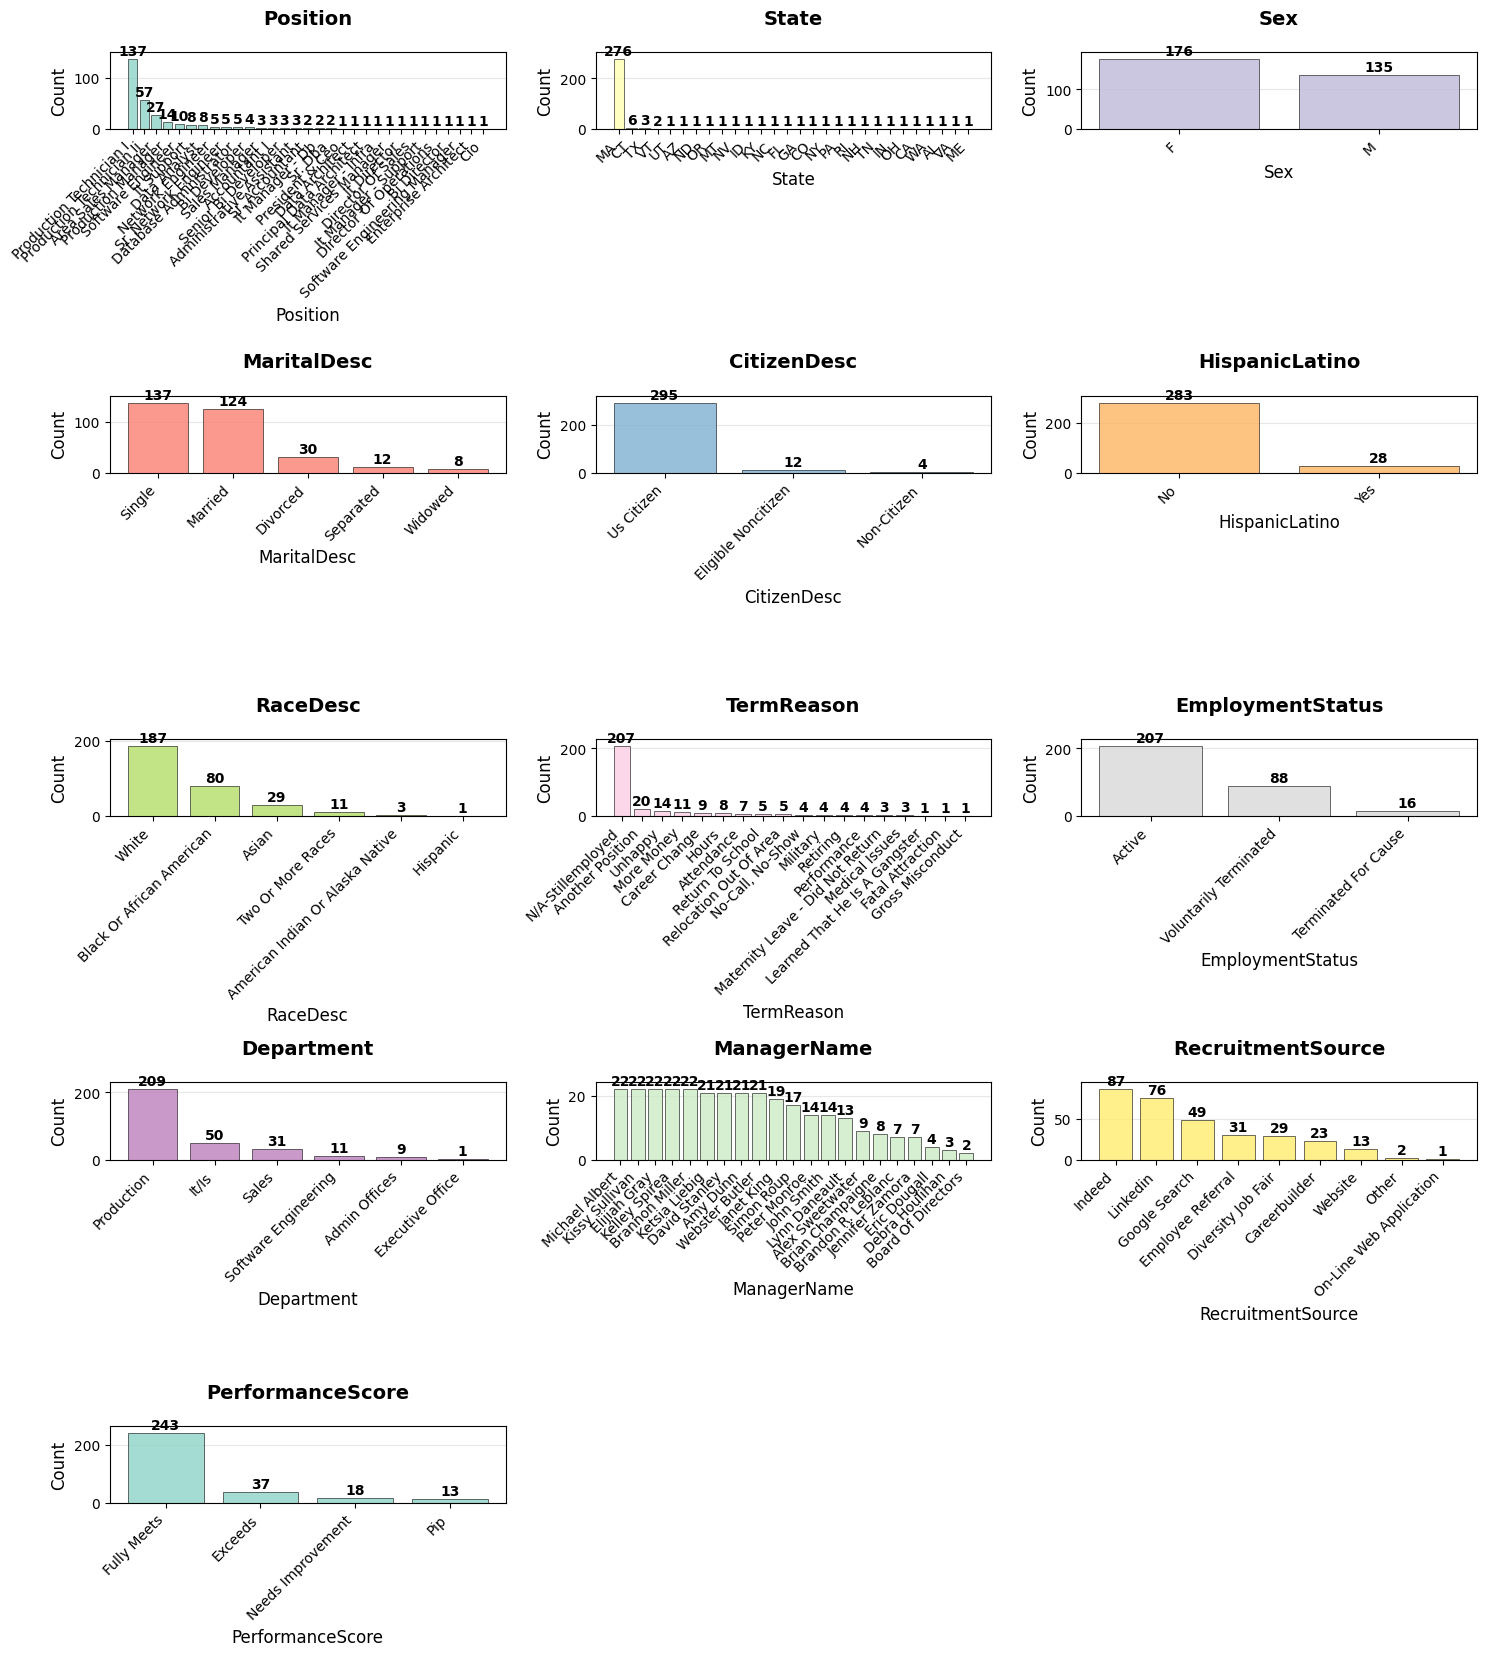

In [33]:
import numpy as np
from matplotlib.patches import Rectangle

def create_bar_plots_for_all_columns(df, exclude_cols=None, figsize=(15, 10)):
    """
    Create bar plots for all categorical columns in the DataFrame
    
    Parameters:
    df: pandas DataFrame
    exclude_cols: list of columns to exclude from plotting
    figsize: tuple for figure size
    """
    if exclude_cols is None:
        exclude_cols = ['Employee_Name', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
    
    # Get categorical columns (non-numeric)
    categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
    
    # Remove excluded columns
    categorical_cols = [col for col in categorical_cols if col not in exclude_cols]
    
    # Calculate number of rows and columns for subplots
    n_cols = 3  # Number of columns in subplot grid
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ceiling division
    
    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows / 3))
    
    # Flatten axes array for easy indexing
    if n_rows == 1:
        axes = np.array([axes]) if n_cols == 1 else axes
    axes = axes.flatten() if n_rows > 1 else axes
    
    # Color palette
    colors = plt.cm.Set3(np.linspace(0, 1, 12))
    
    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        
        # Get value counts
        value_counts = df[col].value_counts(dropna=False)
        
        # Create bar plot
        bars = ax.bar(range(len(value_counts)), value_counts.values, 
                     color=colors[i % len(colors)], alpha=0.8, edgecolor='black', linewidth=0.5)
        
        # Customize the plot
        ax.set_title(f'{col}', fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        
        # Set x-axis labels
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        # Add value labels on top of bars
        for bar, value in zip(bars, value_counts.values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values) * 0.01,
                   f'{value}', ha='center', va='bottom', fontweight='bold')
        
        # Add grid for better readability
        ax.grid(axis='y', alpha=0.3)
        ax.set_axisbelow(True)
        
        # Set y-axis to start from 0
        ax.set_ylim(0, max(value_counts.values) * 1.1)
    
    # Hide unused subplots
    for i in range(len(categorical_cols), len(axes)):
        axes[i].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function to create bar plots for all columns
create_bar_plots_for_all_columns(df)

Creating individual plots for key columns...


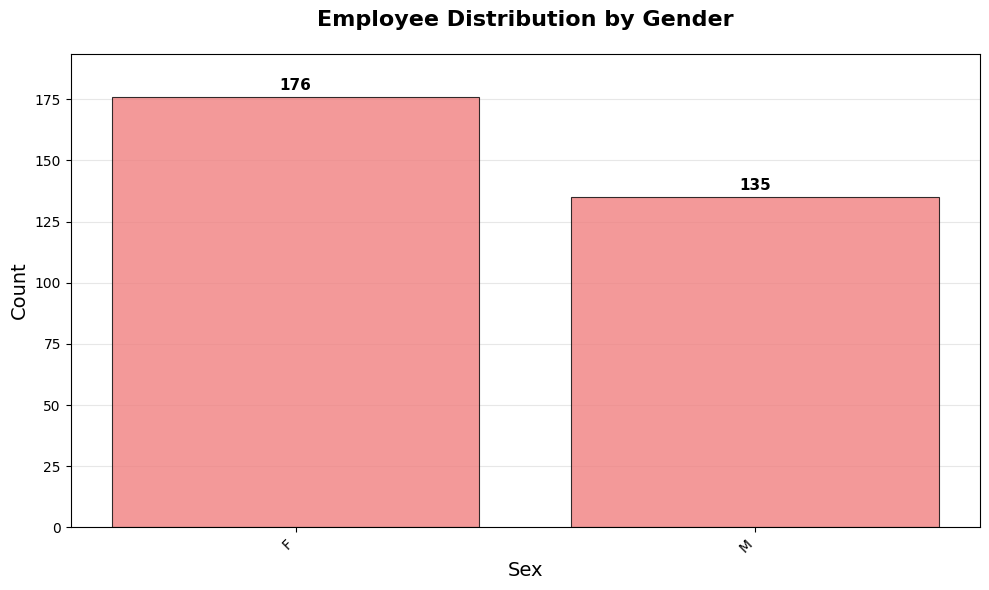

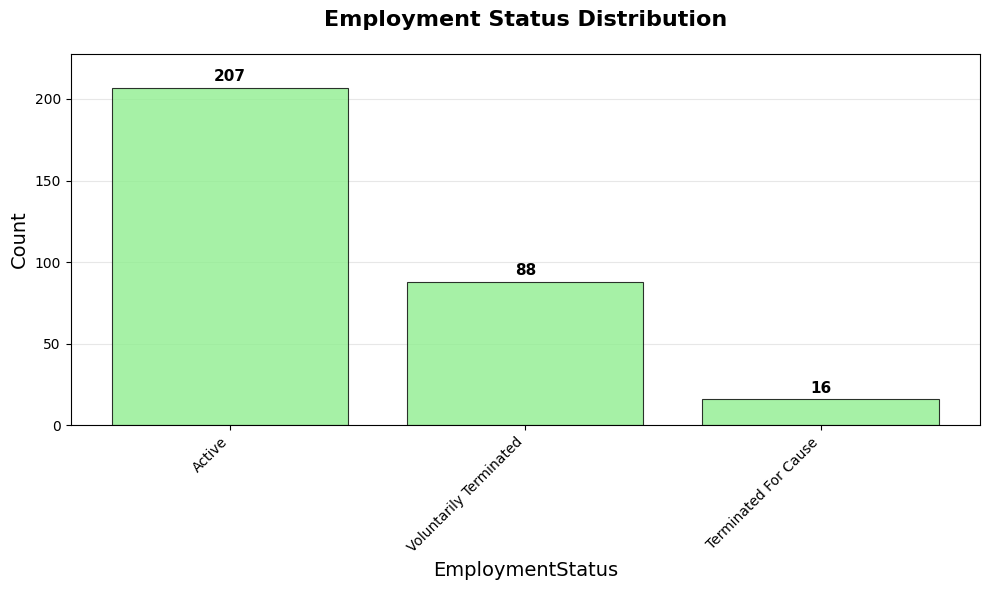

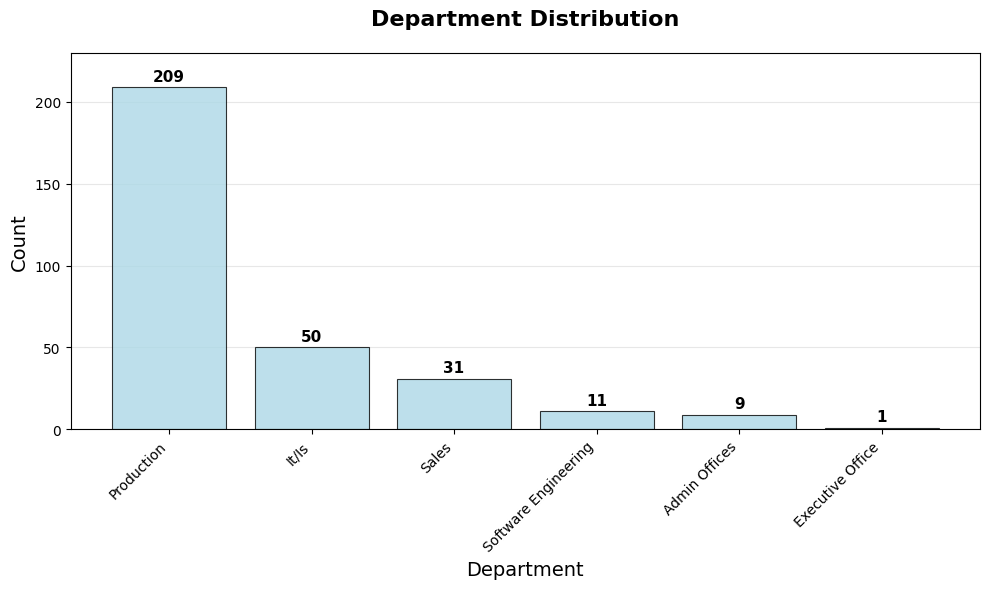

: 

In [ ]:
def create_individual_bar_plot(df, column_name, figsize=(10, 6), color='skyblue', title=None):
    """
    Create an individual bar plot for a specific column
    
    Parameters:
    df: pandas DataFrame
    column_name: name of the column to plot
    figsize: tuple for figure size
    color: color for the bars
    title: custom title for the plot
    """
    plt.figure(figsize=figsize)
    
    # Get value counts
    value_counts = df[column_name].value_counts(dropna=False)
    
    # Create bar plot
    bars = plt.bar(range(len(value_counts)), value_counts.values, 
                  color=color, alpha=0.8, edgecolor='black', linewidth=0.8)
    
    # Customize the plot
    plot_title = title if title else f'{column_name} Distribution'
    plt.title(plot_title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Set x-axis labels
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    
    # Add value labels on top of bars
    for bar, value in zip(bars, value_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values) * 0.01,
               f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3)
    plt.gca().set_axisbelow(True)
    
    # Set y-axis to start from 0
    plt.ylim(0, max(value_counts.values) * 1.1)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example: Create individual plots for specific columns of interest
print("Creating individual plots for key columns...")

# Example usage for the termination-related analysis like your attached image
create_individual_bar_plot(df, 'Sex', color='lightcoral', title='Employee Distribution by Gender')
create_individual_bar_plot(df, 'EmploymentStatus', color='lightgreen', title='Employment Status Distribution')
create_individual_bar_plot(df, 'Department', color='lightblue', title='Department Distribution')